In [1]:
#Sample script for OPTICS clustering
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from networkx.readwrite import edgelist
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)


In [2]:
#Helper function to draw graph
options = {
    "font_size": 6,
    #"node_size": 50,
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    }
def draw_graph(G,axis,Nod_Color_data,vmax,vmin,xlim,ylim,node_size=50,cmap=plt.cm.bwr,Title="Title",cbar_title="Cbar_title"):
    ax_graph=axis
    pos=dict()
    for node in G:
        pos[node]=(G.nodes[node]['x'],G.nodes[node]['y'])
    nx.draw_networkx(G, pos=pos,node_color=Nod_Color_data,with_labels=False,ax=ax_graph,edgelist=[], cmap=cmap,vmax=vmax,vmin=vmin,node_size=node_size,**options)
    # Set margins for the axes so that nodes aren't clipped
    ax_graph.margins(0.20)
    ax_graph.set_xlim(xlim[0],xlim[1])
    ax_graph.set_ylim(ylim[0],ylim[1])
    ax_graph.set_title(Title)
    cbar=plt.colorbar(ScalarMappable(Normalize(vmin,vmax),cmap=cmap))
    cbar.set_label(cbar_title,weight='bold',rotation=270)


In [3]:
#-----------------Get_data_from graph----------------------#

G :nx.Graph=nx.read_graphml("19Norm.gml")
feat_data = []
node_map = {} # map node to Node_ID
i=1
for node in G:
    features=list(G.nodes[node].values())
    feat_data.append([float(x) for x in features])
    node_map[node] = i
    i+=1
feat_data = np.asarray(feat_data)
Attr=pd.DataFrame(feat_data)
#print(Attr)
pe=Attr[4]
type=Attr[0]
node_size=Attr[0]*100
v_max=np.round(np.mean(pe)+2*np.std(pe),decimals=1)
v_min=np.round(np.mean(pe)-2*np.std(pe),decimals=1)
#fig,ax=plt.subplots(1,1,figsize=(10,8))
#draw_graph(G,ax,pe,v_max,v_min,(-1,21),(-1,21),Title="PE",cbar_title="P.E.",node_size=node_size)
# fig.savefig("Atomicstructure.png")
node_pos_x=[]
node_pos_y=[]
for node in G:
    node_pos_x+=[G.nodes[node]['x']]
    node_pos_y+=[G.nodes[node]['y']]
Actual_PE_data :pd.DataFrame=pd.DataFrame({'x':node_pos_x,'y':node_pos_y,'pe':pe,'type':type})
#Actual_PE_data.to_csv("Actual_pe.csv")
#plt.show()
#-----------------------------------------------------------#


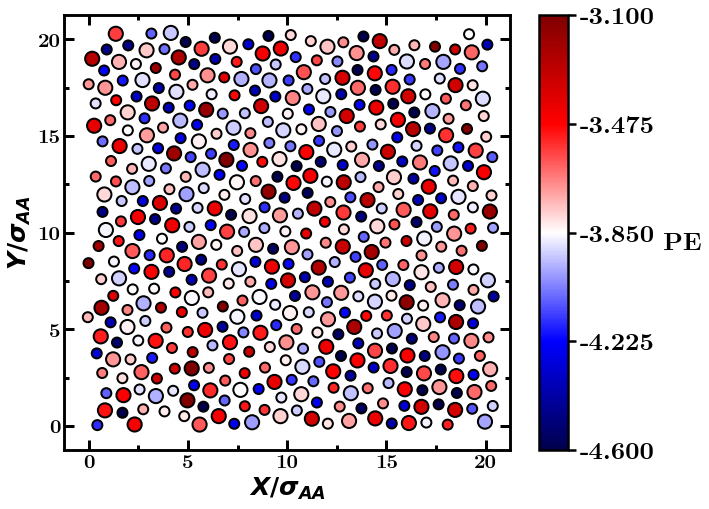

In [4]:
#Plotting actual pe

from matplotlib.ticker import AutoMinorLocator
fig,ax =plt.subplots(1,1,figsize=(8,8))
mycmap=plt.cm.seismic
plt.rcParams['axes.linewidth']=2.5
plt.rcParams["font.family"]='CMU serif'
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size']=25
ax.scatter(node_pos_x,node_pos_y,s=node_size,c=pe,cmap=mycmap,norm=Normalize(v_min,v_max),edgecolors='k',linewidths=2)
ax.tick_params(width=3,direction='in',length=10,labelsize=25)
ax.set_ylim(-1.25,21.25)
ax.set_xlim(-1.25,21.25)#(-2.5,22.5)
ax.tick_params(which='minor',width=3,direction='in',length=5,labelsize=25)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))


ax.set_xticks(ticks=[0,5,10,15,20])
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

ax.set_yticks(ticks=[0,5,10,15,20])
ax.set_xticklabels(labels=['0','5','10','15','20'],fontname='CMU Serif',fontsize=20,fontweight='bold')
ax.set_yticklabels(labels=['0','5','10','15','20'],fontname='CMU Serif',fontsize=20,fontweight='bold')
a2=ax.twinx()
a3=ax.twiny()
a2.set_ylim(-1.25,21.25)
a3.set_xlim(-1.25,21.25)
a2.yaxis.set_major_locator(MultipleLocator(5))
a3.xaxis.set_major_locator(MultipleLocator(5))
a2.minorticks_on()
a3.minorticks_on()
a2.xaxis.set_minor_locator(AutoMinorLocator(2))
a2.yaxis.set_minor_locator(AutoMinorLocator(2))
a3.xaxis.set_minor_locator(AutoMinorLocator(2))
a3.yaxis.set_minor_locator(AutoMinorLocator(2))
a2.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
a3.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
a2.tick_params(width=3,direction='in',length=10,labelright=False)
a3.tick_params(width=3,direction='in',length=10,labeltop=False)
ax.set_xlabel(r'$X/\sigma_{AA}$',fontname='CMU Serif',fontsize=25,fontweight='bold')
ax.set_ylabel(r'$Y/\sigma_{AA}$',fontname='CMU Serif',fontsize=25,fontweight='bold')
cax = plt.axes([0.95,0.125,0.05,0.755])
cbar=plt.colorbar(ScalarMappable(Normalize(v_min,v_max),cmap=mycmap),cax=cax)
cbar.set_label("     PE",weight='bold',rotation=360)

cbar.set_ticks(ticks=np.linspace(v_min,v_max,5))
cbar.ax.tick_params (size=8, width =2.5)
#ax.set_title(r"$(a)$",loc='left',fontsize=20)
#fig.savefig("Act_pe_distr.png",dpi=900,quality=95,bbox_inches=matplotlib.transforms.Bbox([[0, 0], [10, 8]]))
plt.show()

In [5]:
#Clustering

#Read embeddings
Embs=pd.read_csv("Fin_embs_19.csv")

My_clust=OPTICS(metric='cosine',cluster_method='xi')
My_clust.fit(Embs)

order=My_clust.ordering_ 
labels=My_clust.labels_ 
reach=My_clust.reachability_[order]

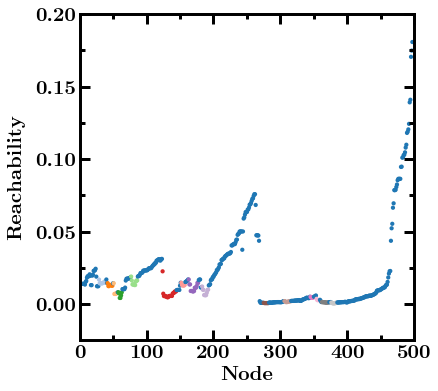

In [6]:
#Reachability plot
fig1,ax1 =plt.subplots(1,1,figsize=(6,6))
mycmap=plt.cm.tab20
ax1.scatter(np.arange(1,len(reach)+1,1),reach,s=5,c=labels[order],cmap=mycmap,norm=Normalize(-1,20),linewidths=2)
ax1.set_xlabel("Node",fontsize=20,fontweight='bold')
ax1.set_ylabel("Reachability",labelpad=10.0,fontsize=20,fontweight='bold')

ax1.tick_params(width=3,direction='in',length=10,labelsize=20)
ax1.set_ylim(-0.025,0.2)
ax1.set_xlim(0,500)
ax1.tick_params(which='minor',width=3,direction='in',length=5,labelsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1_y=ax1.twinx()
ax1_x=ax1.twiny()
ax1_y.set_ylim(-0.025,0.2)
ax1_x.set_xlim(0,500)
ax1_y.yaxis.set_major_locator(MultipleLocator(0.05))
ax1_x.xaxis.set_major_locator(MultipleLocator(100))
ax1_y.minorticks_on()
ax1_x.minorticks_on()
ax1_x.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1_y.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1_y.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
ax1_x.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
ax1_y.tick_params(width=3,direction='in',length=10,labelright=False)
ax1_x.tick_params(width=3,direction='in',length=10,labeltop=False)

ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

#fig1.savefig("Reachability_plot.png",dpi=900,quality=95,bbox_inches=matplotlib.transforms.Bbox([[0, 0], [10, 8]]))
plt.show()



In [7]:
#SORT LABELS INTO CLUSTERS----------------------
a=dict()
for i in range(len(labels)):
    if(labels[i] not in a):
        a[labels[i]]=[]
    a[labels[i]].append(i)

#ANALYSE CLUSTERS-------------------------------
size_clust=[]
avg_pe_clust=[]
var_msd_clust=[]
avg_pe_clust_err=[]
clust_color=[0 for i in range(500)]
pe_color=[0 for i in range(500)]
for i in a.keys():
    size_clust+=[len(a[i])]
    pe=[]
    pos=dict()
    nodeList=[]
    clust_atom_list=[l+1 for l in a[i]]
    for k in a[i]:
        pe+=[Attr[4][k]]
        nodeList+=[str(k+1)]
        clust_color[k]=[i]
        pos[str(k+1)]=(G.nodes[str(k+1)]['x'],G.nodes[str(k+1)]['y'])
    for k in a[i]:
        if(i==-1):
            #Noise_cluster ,colored to grey
            pe_color[k]=-10     
        else:
            pe_color[k]=np.mean(pe)

    avg_pe_clust+=[np.mean(pe)]
    print("\n")
    avg_pe_clust_err+=[np.std(pe)]
    print("Clust No. :",i," Size:",len(a[i])," Avg_pe:",np.mean(pe))
    for k in a[i]:
        print(k+1,end=' ')




Clust No. : 0  Size: 14  Avg_pe: -3.825033571428572
1 35 66 124 252 277 280 384 470 471 479 490 493 499 

Clust No. : -1  Size: 345  Avg_pe: -3.845989565217391
2 4 5 6 9 10 11 12 14 16 17 18 19 20 21 23 24 25 27 28 29 31 34 37 38 39 40 41 42 43 45 47 48 49 50 51 54 56 57 58 59 62 63 64 65 68 69 70 72 73 74 75 76 77 78 79 80 82 84 88 89 90 91 93 95 96 97 98 101 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 121 123 125 126 127 128 131 132 134 137 139 140 141 142 143 144 145 147 148 150 151 152 154 156 160 161 163 164 165 166 167 171 173 174 175 176 177 178 180 181 182 185 186 188 189 190 191 192 193 194 195 196 197 198 200 202 204 205 206 207 208 209 211 212 213 215 217 219 220 221 222 223 224 225 229 230 231 232 233 234 235 236 237 238 239 240 243 245 246 249 251 253 255 256 257 260 261 262 263 268 269 272 274 275 278 279 281 283 284 285 286 287 288 289 291 292 293 294 296 298 300 302 303 304 305 306 307 308 309 310 311 312 313 314 316 319 321 323 324 325 326 329

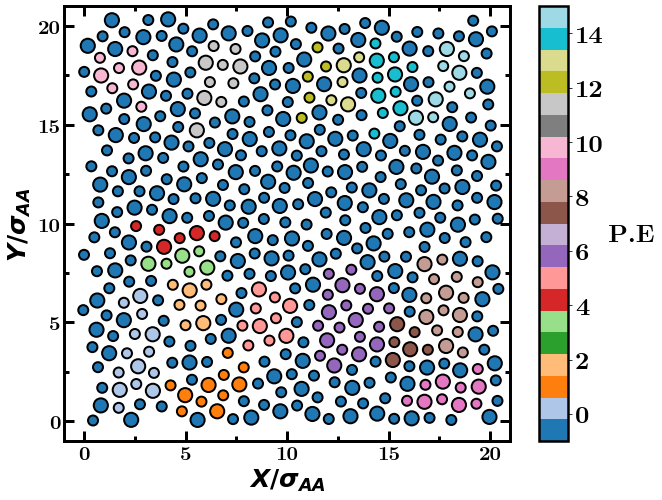

In [21]:
#Clusters visualtisation on graph
fig,ax =plt.subplots(1,1,figsize=(8,8))
#mycmap=plt.cm.seismic
mycmap=plt.cm.tab20
ax.scatter(node_pos_x,node_pos_y,s=node_size,c=labels,cmap=mycmap,norm=Normalize(-1,15),edgecolors='k',linewidths=2)
#ax.scatter(node_pos_x,node_pos_y,s=node_size,c=pe_color,cmap=mycmap,norm=Normalize(v_min,v_max),edgecolors='k',linewidths=2)

ax.tick_params(width=3,direction='in',length=10,labelsize=20)
ax.set_ylim(-1,21)
ax.set_xlim(-1,21)
ax.tick_params(which='minor',width=3,direction='in',length=5,labelsize=20)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_xticks(ticks=[0,5,10,15,20])
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

#ax.set_min
ax.set_yticks(ticks=[0,5,10,15,20])
ax.set_xticklabels(labels=['0','5','10','15','20'],fontname='CMU Serif',fontsize=20,fontweight='bold')
ax.set_yticklabels(labels=['0','5','10','15','20'],fontname='CMU Serif',fontsize=20,fontweight='bold')
a2=ax.twinx()
a3=ax.twiny()
a2.set_ylim(-1,21)
a3.set_xlim(-1,21)
a2.yaxis.set_major_locator(MultipleLocator(5))
a3.xaxis.set_major_locator(MultipleLocator(5))
a2.minorticks_on()
a3.minorticks_on()
a2.xaxis.set_minor_locator(AutoMinorLocator(2))
a2.yaxis.set_minor_locator(AutoMinorLocator(2))
a3.xaxis.set_minor_locator(AutoMinorLocator(2))
a3.yaxis.set_minor_locator(AutoMinorLocator(2))

a2.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
a3.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
a2.tick_params(width=3,direction='in',length=10,labelright=False)
a3.tick_params(width=3,direction='in',length=10,labeltop=False)
ax.set_xlabel(r'$X/\sigma_{AA}$',fontname='CMU Serif',fontsize=25,fontweight='bold')
ax.set_ylabel(r'$Y/\sigma_{AA}$',fontname='CMU Serif',fontsize=25,fontweight='bold')
cax = plt.axes([0.95,0.125,0.05,0.755])
cbar=plt.colorbar(ScalarMappable(Normalize(-1,15),cmap=mycmap),cax=cax)
cbar.set_label("     P.E",weight='bold',rotation=360)

#fig.savefig("clusters_graph.png",dpi=900,quality=95,bbox_inches=matplotlib.transforms.Bbox([[0, 0], [10, 8]]))
plt.show()

C:\Users\DIKSHIKA\AppData\Local\Temp\ipykernel_27136\2742611935.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("seismic").copy()
  mycmap.set_under("lightgray")
C:\Users\DIKSHIKA\AppData\Local\Temp\ipykernel_27136\2742611935.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("seismic").copy()
  mycmap.set_over("lightgray")


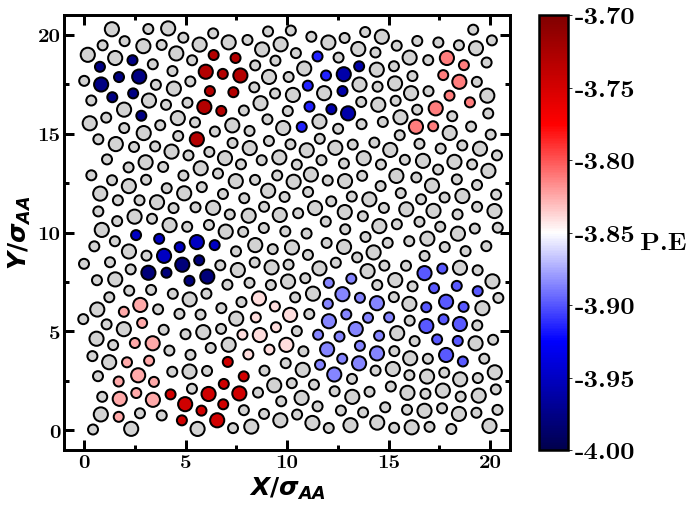

In [24]:
#Clusters average potential energy visualtisation on graph
v_min=-4.0  #np.round(np.mean(pe_color)-2*np.std(pe_color),decimals=1)
v_max=-3.7  #np.round(np.mean(pe_color)+2*np.std(pe_color),decimals=1)
from matplotlib.ticker import AutoMinorLocator
fig,ax =plt.subplots(1,1,figsize=(8,8))
mycmap=plt.cm.seismic
mycmap.set_under("lightgray")
mycmap.set_over("lightgray")
ax.scatter(node_pos_x,node_pos_y,s=node_size,c=pe_color,cmap=mycmap,norm=Normalize(v_min,v_max),edgecolors='k',linewidths=2)

ax.tick_params(width=3,direction='in',length=10,labelsize=20)
ax.set_ylim(-1,21)
ax.set_xlim(-1,21)
ax.tick_params(which='minor',width=3,direction='in',length=5,labelsize=20)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_xticks(ticks=[0,5,10,15,20])
ax.minorticks_on()
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

#ax.set_min
ax.set_yticks(ticks=[0,5,10,15,20])
ax.set_xticklabels(labels=['0','5','10','15','20'],fontname='CMU Serif',fontsize=20,fontweight='bold')
ax.set_yticklabels(labels=['0','5','10','15','20'],fontname='CMU Serif',fontsize=20,fontweight='bold')
a2=ax.twinx()
a3=ax.twiny()
a2.set_ylim(-1,21)
a3.set_xlim(-1,21)
a2.yaxis.set_major_locator(MultipleLocator(5))
a3.xaxis.set_major_locator(MultipleLocator(5))
a2.minorticks_on()
a3.minorticks_on()
a2.xaxis.set_minor_locator(AutoMinorLocator(2))
a2.yaxis.set_minor_locator(AutoMinorLocator(2))
a3.xaxis.set_minor_locator(AutoMinorLocator(2))
a3.yaxis.set_minor_locator(AutoMinorLocator(2))

a2.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
a3.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
a2.tick_params(width=3,direction='in',length=10,labelright=False)
a3.tick_params(width=3,direction='in',length=10,labeltop=False)
ax.set_xlabel(r'$X/\sigma_{AA}$',fontname='CMU Serif',fontsize=25,fontweight='bold')
ax.set_ylabel(r'$Y/\sigma_{AA}$',fontname='CMU Serif',fontsize=25,fontweight='bold')
cax = plt.axes([0.95,0.125,0.05,0.755])
cbar=plt.colorbar(ScalarMappable(Normalize(v_min,v_max,5),cmap=mycmap),cax=cax)
cbar.set_label("     P.E",weight='bold',rotation=360)

#fig.savefig("clusters_avg_pe_graph.png",dpi=900,quality=95,bbox_inches=matplotlib.transforms.Bbox([[0, 0], [10, 8]]))
plt.show()

C:\Users\DIKSHIKA\AppData\Local\Temp\ipykernel_27136\4183010464.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("seismic").copy()
  mycmap.set_under("lightgray")
C:\Users\DIKSHIKA\AppData\Local\Temp\ipykernel_27136\4183010464.py:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("seismic").copy()
  mycmap.set_over("lightgray")


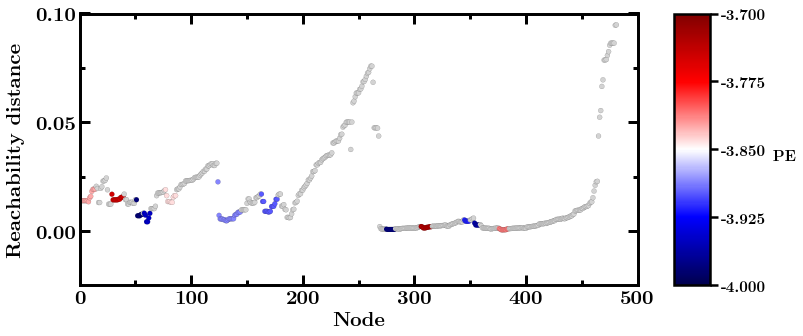

In [27]:
#Reachability plot with cluster avg pe color

v_min=-4.0#np.round(np.mean(pe_color)-2*np.std(pe_color),decimals=1)
v_max=-3.7#np.round(np.mean(pe_color)+2*np.std(pe_color),decimals=1)

mycmap=plt.cm.seismic
mycmap.set_under("lightgray")
mycmap.set_over("lightgray")

fig1,ax1 =plt.subplots(1,1,figsize=(10,5))
mycmap=plt.cm.seismic
ax1.scatter(np.arange(1,len(reach)+1,1),reach,s=25,c=np.array(pe_color)[order],cmap=mycmap,norm=Normalize(v_min,v_max),linewidths=2,edgecolors='k',linewidth=0.1)
#ax1.set_ylim(0,0.005)
ax1.set_xlabel("Node",fontsize=20,fontweight='bold')
ax1.set_ylabel("Reachability distance",labelpad=10.0,fontsize=20,fontweight='bold')

ax1.tick_params(width=3,direction='in',length=10,labelsize=20)
ax1.set_ylim(-0.025,0.1)
ax1.set_xlim(0,500)
ax1.tick_params(which='minor',width=3,direction='in',length=5,labelsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1_y=ax1.twinx()
ax1_x=ax1.twiny()
ax1_y.set_ylim(-0.025,0.1)
ax1_x.set_xlim(0,500)
ax1_y.yaxis.set_major_locator(MultipleLocator(0.05))
ax1_x.xaxis.set_major_locator(MultipleLocator(100))
ax1_y.minorticks_on()
ax1_x.minorticks_on()
ax1_x.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1_y.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1_y.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
ax1_x.tick_params(which='minor',width=3,direction='in',length=5,labelright=False)
ax1_y.tick_params(width=3,direction='in',length=10,labelright=False)
ax1_x.tick_params(width=3,direction='in',length=10,labeltop=False)

ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.rcParams['font.size']=15
cax = plt.axes([0.95,0.125,0.05,0.755])
cbar=plt.colorbar(ScalarMappable(Normalize(v_min,v_max),cmap=mycmap),cax=cax)
cbar.set_label("     PE",weight='bold',rotation=360,fontsize=15)

cbar.set_ticks(ticks=np.linspace(v_min,v_max,5))
cbar.ax.tick_params (size=8, width =2.5)
#fig1.savefig("Reachability_pe_plot.png",dpi=900,quality=95,bbox_inches=matplotlib.transforms.Bbox([[0, 0], [10, 8]]))
plt.show()

 